In [1]:
# import libraries
import os
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.makedirs("fig3_pca_graphs",exist_ok=True)

# 1 Loading Dataset

In [3]:
pca = joblib.load('pca_model.joblib')

In [4]:
df_pca = pd.read_csv('pca_data.csv', index_col=0)

# 2 Pre-processing

In [5]:
tumor_cols = ['Tumor_BRCA', 'Tumor_CM', 'Tumor_CRC', 'Tumor_NSCLC', 'Tumor_PDAC']
df_pca['Tumor'] = df_pca[tumor_cols].idxmax(axis=1).str.replace('Tumor_', '')

In [6]:
print("Tumor Types:", df_pca['Tumor'].unique())
print("Treatment Types:", df_pca['Treatment'].unique())

Tumor Types: ['BRCA' 'NSCLC' 'CRC' 'PDAC' 'CM']
Treatment Types: ['BGJ398' 'binimetinib' 'BKM120' 'BYL719' 'BYL719 + LJM716' 'CGM097'
 'CLR457' 'HDM201' 'INC424' 'LEE011' 'LKA136' 'LLM871' 'paclitaxel'
 'cetuximab' 'CKX620' 'encorafenib' 'LFW527 + binimetinib'
 'BKM120 + binimetinib' 'WNT974']


In [7]:
cancer_columns = [col for col in df_pca.columns if col.startswith('Tumor_')]
treatment_columns = [col for col in df_pca.columns if col.startswith('Tr_')]

In [8]:
pca_columns_old = [f'PCA_{i}' for i in range(200)]
pca_columns_new = [f'PC {i}' for i in range(1, 201)]
df_pca.rename(columns=dict(zip(pca_columns_old, pca_columns_new)), inplace=True)

In [9]:
df_pca.columns

Index(['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9',
       'PC 10',
       ...
       'Tr_encorafenib', 'Tr_paclitaxel', 'Tumor_BRCA', 'Tumor_CM',
       'Tumor_CRC', 'Tumor_NSCLC', 'Tumor_PDAC', 'BestResCatCalc', 'Treatment',
       'Tumor'],
      dtype='object', length=227)

In [10]:
df_pca.to_csv("fig3_pca_graphs/df_pca_processed.csv", index=False)

# Plots

In [13]:
custom_palette = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', 
                  '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', 
                  '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', 
                  '#000075', '#808080', '#ffffff', '#000000']
sns.set_palette(custom_palette)

## Fig3 (A) variance explained by different number of top principal components

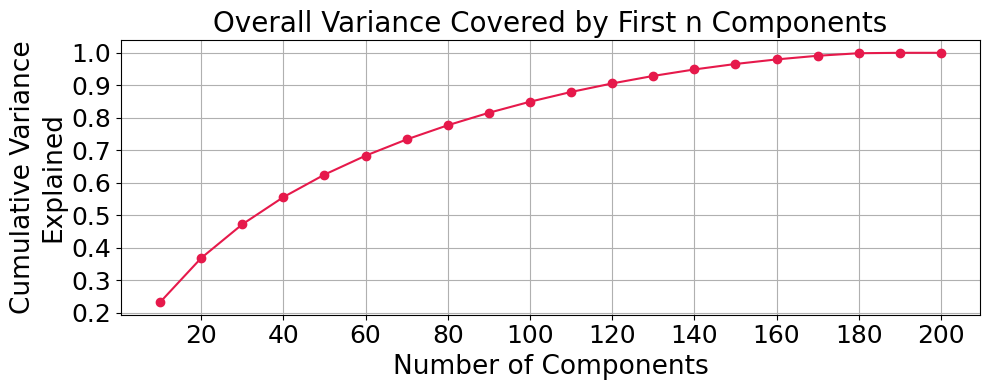

In [14]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

components_range = np.arange(10, 200 + 1, 10)
variance_covered = cumulative_variance_ratio[components_range - 1]

plt.figure(figsize=(10, 4))
plt.plot(components_range, variance_covered, marker='o')
plt.title('Overall Variance Covered by First n Components', fontsize=20)
plt.xlabel('Number of Components', fontsize=19)
plt.ylabel('Cumulative Variance\nExplained', fontsize=19)
plt.xticks(list(range(20,201,20)),fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.savefig('fig3_pca_graphs/fig3_a_pca_cumulative_variance_1200', dpi=1200, bbox_inches='tight')
plt.show()

In [15]:
eigenvalues = pca.explained_variance_
total_variance = np.sum(eigenvalues)

for num_components in list(range(20,201,20)):
    explained_variance_n = np.sum(eigenvalues[:num_components])
    variance_ratio_n = explained_variance_n / total_variance
    print(f"Variance explained by the first {num_components} components: {variance_ratio_n * 100:.2f}%")

Variance explained by the first 20 components: 36.83%
Variance explained by the first 40 components: 55.59%
Variance explained by the first 60 components: 68.34%
Variance explained by the first 80 components: 77.70%
Variance explained by the first 100 components: 84.94%
Variance explained by the first 120 components: 90.57%
Variance explained by the first 140 components: 94.88%
Variance explained by the first 160 components: 97.97%
Variance explained by the first 180 components: 99.87%
Variance explained by the first 200 components: 100.00%


In [16]:
df_variance = pd.DataFrame({'components': components_range,'variance_covered': variance_covered})
df_variance.to_csv('fig3_pca_graphs/df_pca_variance.csv', index=False)

## Fig3 (B) separation of different cancer types in top 4 components of PCA space

In [17]:
def pc_pairs_cancer(data,pcs, palette_type):
    df_principal = pd.DataFrame(data=df_pca, columns=[f'PC {i}' for i in range(1, (pcs+1))])
    df_principal['Tumor'] = df_pca['Tumor']
    
    sns.set_style("whitegrid")
    sns.set_context("talk", font_scale=1)
    
    g = sns.pairplot(data=df_principal, hue='Tumor', markers='o', 
                 palette=sns.set_palette(palette_type,len(df_pca['Tumor'].unique())),
                 plot_kws={'alpha': 0.9},diag_kws={'alpha': 0.4})
    
    sns.move_legend(g,"lower center",bbox_to_anchor=(0.45, -0.08),labels=list(g._legend_data.keys()),
                    ncol=5,frameon=True)

    for text in g.legend.get_texts():
        text.set_fontsize(18)
    
    plt.savefig('fig3_pca_graphs/fig3_b_pca_pairs_cancers_1200_pcs'+str(pcs), dpi=1200, bbox_inches='tight')
    plt.show()

/Users/amused/anaconda3/envs/mpgem/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/amused/anaconda3/envs/mpgem/lib/python3.11/site-packages/seaborn/utils.py:482: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


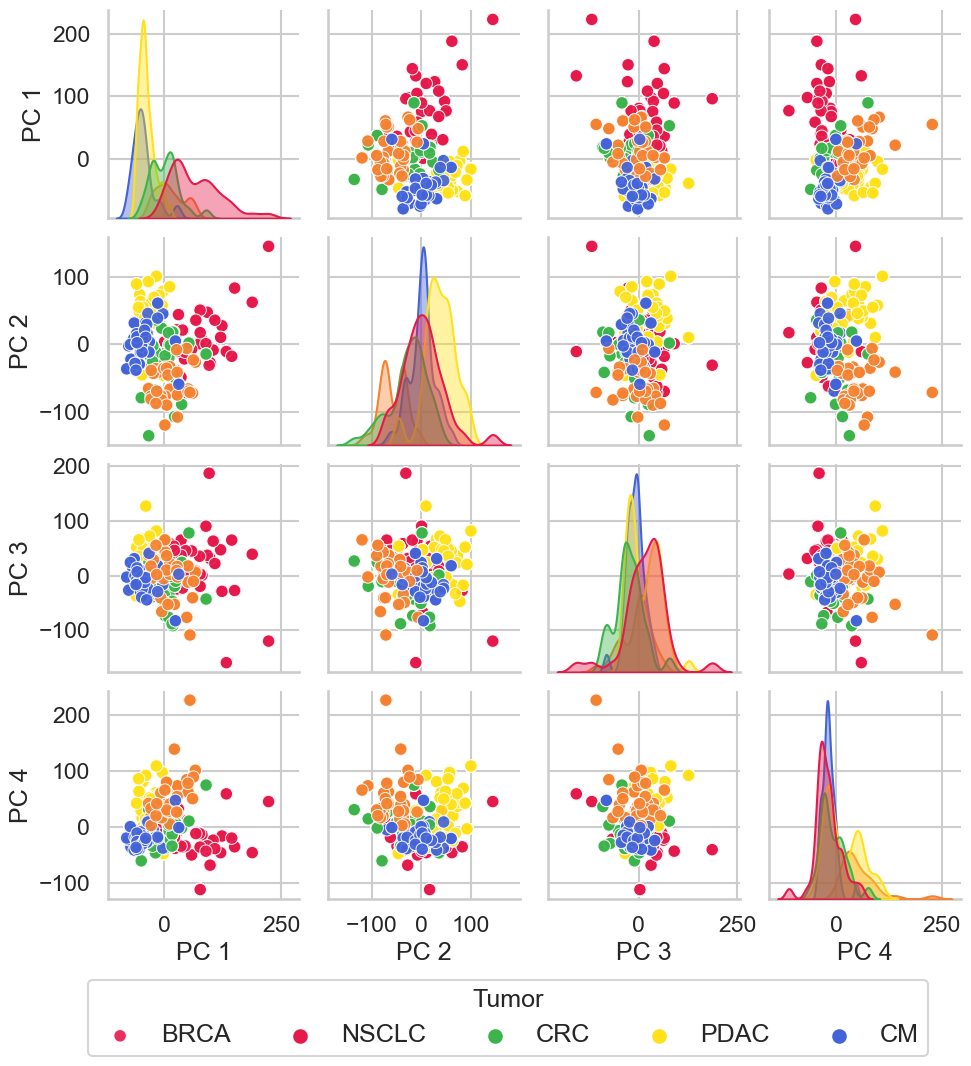

In [18]:
pc_pairs_cancer(df_pca,4, custom_palette) # first 4 PC pairplot

## Fig3 (C) separation of different treatment types in top 4 components of PCA space

In [19]:
def pc_pairs_treatment(data,pcs, palette_type):
    df_principal = pd.DataFrame(data=df_pca, columns=[f'PC {i}' for i in range(1, (pcs+1))])
    df_principal['Treatment'] = df_pca['Treatment']
    
    sns.set_style("whitegrid")
    sns.set_context("talk", font_scale=1)
    
    g = sns.pairplot(data=df_principal, hue='Treatment', markers='o', 
                 palette=sns.set_palette(palette_type,len(df_pca['Treatment'].unique())),
                 plot_kws={'alpha': 0.9},diag_kws={'alpha': 0.1})
    
    sns.move_legend(g,"lower center", bbox_to_anchor=(0.37, -0.21), labels=list(g._legend_data.keys()),ncol=4,frameon=True)
    
    for text in g.legend.get_texts():
        text.set_fontsize(16)
    
    plt.savefig('fig3_pca_graphs/fig3_c_pca_pairs_treatment_1200_pcs'+str(pcs), dpi=1200, bbox_inches='tight')
    plt.show()

/Users/amused/anaconda3/envs/mpgem/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/amused/anaconda3/envs/mpgem/lib/python3.11/site-packages/seaborn/utils.py:482: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc=loc, **props)


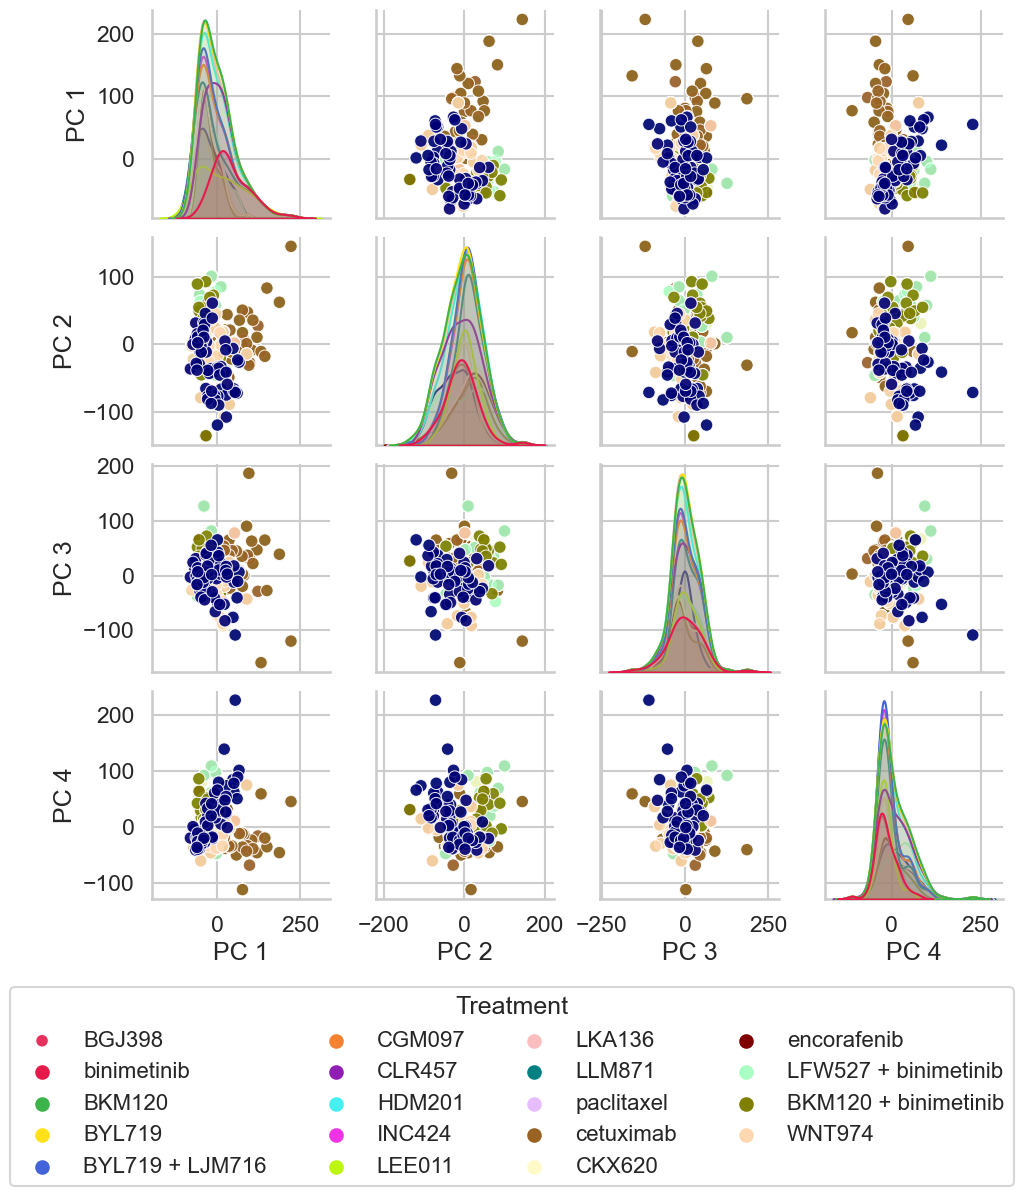

In [20]:
pc_pairs_treatment(df_pca,4,custom_palette) #  # first 4 PC pairplot